## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`


### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one


In [1]:
# Dataset

In [10]:
import os, zipfile, requests

In [12]:
if not os.path.exists("bank-full.csv"):
    print("Downloading bank-full.csv file...")
    response = requests.get("https://archive.ics.uci.edu/static/public/222/bank+marketing.zip")
    with open("bank+marketing.zip", 'wb') as zip_file:
        zip_file.write(response.content)
    with zipfile.ZipFile("bank+marketing.zip", "r") as zip_file:
        zip_file.extractall()
    with zipfile.ZipFile("bank.zip", "r") as zip_file:
        zip_file.extractall()
    for file in [
        "bank+marketing.zip",
        "bank.zip",
        "bank-additional.zip",
        "bank.csv",
        "bank-names.txt",
    ]:
        os.remove(file)
    print("bank-full.csv was downloaded successfully.")
    
else:
    print("bank-full.csv is already downloaded.")

bank-full.csv was downloaded successfully.


In [4]:
# Data preparation

In [16]:
import pandas as pd
df = pd.read_csv("bank-full.csv", delimiter=";")
df = df[[
    "age",
    "job",
    "marital",
    "education",
    "balance",
    "housing",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "y"
]]
df.isnull().sum() 

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

In [18]:
# df["education"].value_counts()
df["education"].mode()[0]

'secondary'

### Question 2.

In [20]:
import seaborn as sns

<Axes: >

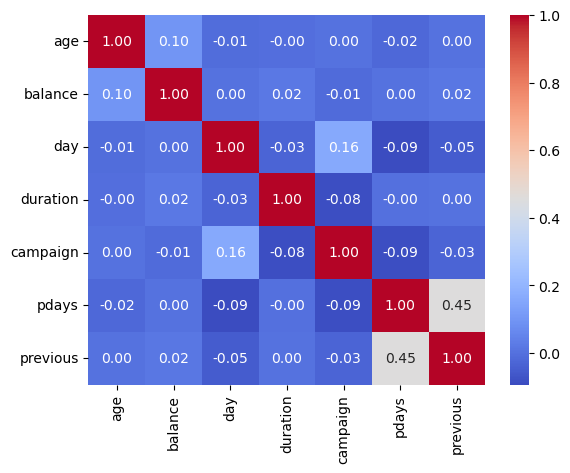

In [22]:
numerical = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
print("`age` and `balance`:\t", correlation_matrix["age"]["balance"].item())
print("`day` and `campaign`:\t", correlation_matrix["day"]["campaign"].item())
print("`day` and `pdays`:\t", correlation_matrix["day"]["pdays"].item())
print("`pdays` and `previous`:\t", correlation_matrix["pdays"]["previous"].item())

`age` and `balance`:	 0.09778273937134807
`day` and `campaign`:	 0.1624902163261922
`day` and `pdays`:	 -0.09304407377294048
`pdays` and `previous`:	 0.4548196354805043


In [12]:
# Target encoding

In [13]:
df.y = (df.y == 'yes').astype(int)

In [14]:
# Split the data

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
RANDOM_STATE = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=RANDOM_STATE)
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
del df_train['y']
del df_val['y']
del df_test['y']

### Question 3.

In [36]:
categorical = df.columns[df.dtypes == "object"].to_list()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [46]:
from sklearn.metrics import mutual_info_score

In [48]:
def mutual_info_y_score(series):
    return round(mutual_info_score(series, y_train), 2)

In [50]:
mi = df_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False).index[0]

KeyError: "['y'] not in index"

### Question 4.

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [27]:
y_pred = model.predict_proba(X_val)[:, 1]
round(((y_pred >= 0.5) == y_val).mean().item(), 2)

0.9

In [28]:
# Question 5.

In [29]:
def get_X_train_and_X_val(features):
    dv = DictVectorizer(sparse=False)
    
    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    return X_train, X_val

def train_model(X_train):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

def validation_accuracy(X_val):
    y_pred = model.predict_proba(X_val)[:, 1]
    return ((y_pred >= 0.5) == y_val).mean().item()

In [30]:
X_train, X_val = get_X_train_and_X_val(categorical + numerical)
model = train_model(X_train)
all_features_y_acc = validation_accuracy(X_val)

In [8]:
for eliminated_feature in ["age", "balance", "marital", "previous"]:
    features = (categorical + numerical)
    features.remove(eliminated_feature)
    X_train, X_val = get_X_train_and_X_val(features)
    model = train_model(X_train)
    acc = validation_accuracy(X_val)
    print(eliminated_feature, ": ", abs(acc - all_features_y_acc))
    

NameError: name 'categorical' is not defined

In [32]:
# Question 6.

In [33]:
def train_model(X_train, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

In [34]:
C_values = [0.01, 0.1, 1, 10, 100]

X_train, X_val = get_X_train_and_X_val(categorical + numerical)

for C in C_values:
    model = train_model(X_train, C)
    print(C, ": ", round(validation_accuracy(X_val), 3))

0.01 :  0.899
0.1 :  0.9
1 :  0.901
10 :  0.901
100 :  0.901
